In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML
from IPython.display import display
% matplotlib inline

# Gathering Data

## Loading Twitter archive dataset from a csv file

In [2]:
basic_df = pd.read_csv('twitter-archive-enhanced-2.csv', encoding='utf-8')

## Getting tweet image predictions data from Udacity

In [3]:
# access Udacity servers where the data is stored
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [4]:
# write the data to a tsv file
current_dir = os.getcwd()

with open(os.path.join(current_dir, 'image-predictions.tsv'), mode='wb') as file:
    file.write(r.content)

In [5]:
# load the data to a dataframe from the tsv file
image_df = pd.read_csv('image-predictions.tsv', delimiter='\t')

## Getting additional data per tweet from Tweeter API

In [6]:
# load the json data from the txt file to a datarame
extended_df = pd.read_json('tweet-json.txt', lines=True)

# Assessing Data

In [7]:
basic_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
basic_df.shape

(2356, 17)

In [9]:
basic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are some tweets that are replies or retweets, not the originally published tweet.

In [10]:
basic_df[(basic_df.text.str.contains('doggo'))&(basic_df.doggo == 'None')][['tweet_id', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,tweet_id,text,name,doggo,floofer,pupper,puppo
83,876537666061221889,I can say with the pupmost confidence that the...,None,None,None,None,None
268,841439858740625411,Here we have some incredible doggos for #K9Vet...,None,None,None,None,None
302,836648853927522308,RT @SchafeBacon2016: @dog_rates Slightly distu...,None,None,None,None,None
475,816062466425819140,RT @dog_rates: Meet Jack. He's one of the rare...,Jack,None,None,None,None
477,815990720817401858,Meet Jack. He's one of the rare doggos that do...,Jack,None,None,None,None
798,772877495989305348,You need to watch these two doggos argue throu...,None,None,None,None,None
934,753420520834629632,Here we are witnessing an isolated squad of bo...,None,None,None,None,None
946,752568224206688256,Here are three doggos completely misjudging an...,None,None,None,None,None
987,749036806121881602,This is Dietrich. He hops at random. Other dog...,Dietrich,None,None,None,None
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,this,None,None,None,None


We can tell that in some cases the tweet text contains the word "doggo", however, the category "doggo" is not assigned. 

On the other hand, dog stage is encoded by 4 variables (dogggo, floofer, pupper and puppo), whereas according to the tidiness principles, they should be encoded by 1 variable.

In [11]:
basic_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Toby            7
Bailey          7
an              7
Buddy           7
Daisy           7
Stanley         6
Bella           6
Scout           6
Jax             6
Oscar           6
Milo            6
Leo             6
Jack            6
Rusty           6
Koda            6
Dave            6
very            5
             ... 
Nico            1
Samsom          1
Zuzu            1
Longfellow      1
Izzy            1
Fletcher        1
Benny           1
Gin             1
Goose           1
Chevy           1
Barney          1
Bode            1
Jomathan        1
Saydee          1
Charleson       1
Karma           1
Beebop          1
Mack            1
Willem          1
Perry           1
Laika           1
Sully           1
Bonaparte       1
Shnuggles       1
Al        

Some of the assigned dog names are wrong, for example, "None", "a", "the", etc.

In [12]:
basic_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
basic_df[basic_df.rating_denominator != 10][['tweet_id','text']]

,tweet_id,text
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...
342,832088576586297345,@docmisterio account started on 11/15/15
433,820690176645140481,The floofs have been released I repeat the flo...
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...
784,775096608509886464,"RT @dog_rates: After so many requests, this is..."
902,758467244762497024,Why does this never happen at my front door......
1068,740373189193256964,"After so many requests, this is Bretagne. She ..."
1120,731156023742988288,Say hello to this unbelievably well behaved sq...
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...
1202,716439118184652801,This is Bluebert. He just saw that both #Final...


Some of the ratings denominators are not 10.

In [14]:
basic_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Some numerators are very high, for example 420 or 1776. There are some cases where the numerator is 0.

Also, numerator and denominator both represent a dog's rating, therefore according to the tidiness principles, they should be encoded in 1 variable.

In [15]:
basic_df.tweet_id.nunique()

2356

All the tweets are unique, there are no duplicates.

In [16]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are less image predictions than tweets, which means that for some of the tweets the prediction is missing.

In [18]:
image_df.tweet_id.nunique()

2075

All the tweet ids in the images table are unique, there are no duplicates.

In [19]:
image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

Some of the predictions are not dog breeds.

In [20]:
extended_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [21]:
extended_df.shape

(2354, 31)

In [22]:
extended_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

## Issues to be fixed


### Quality Issues 

**Basic DF**
- Some of the tweets are retweets, we need to keep ony the original tweets
- Some dog names are "None" or words that are not names (*a, the, an, very*, etc.)
- Some ratings denominators are not 10
- Some ratings numerators seem too high or too low to be true
- Some of the dog stages are incorrect
- Some dog names are missing (more than 1 dog per tweet) \*


**Image DF**
- Some of the tweets in Basic DF don't have corresponding image prediction 
- Some of the predictions are not dog breeds

### Tidiness Issues 

**Basic DF**

- Dog stage is represented by 4 columns corresponding to each stage, while it should be just 1 column (Tidiness principle *Each variable forms a column.*)
- Dog rating is represented by 2 columns, while can be converted to a single number representation
- Some tweets describe several dogs. There is some information that describes the tweet itself, like when it was created, number of retweets or likes. Whereas some datapoints are related to the dogs that appear in the tweets (dog rating, name, dog stage, predicted dog breed). This contradicts tidiness principle *"Each type of observational unit forms a table"*. \*

\* *added upon iterations during the cleaning phase*

# Cleaning Data


In [23]:
# create copies of the original datasets
basic_clean = basic_df.copy()
image_clean = image_df.copy()
extended_clean = extended_df.copy()

## Removing retweets and replies

We only want to focus on the original tweets coming from WeRateDogs account and remove any retweets or replies.
For that we will remove any tweets that have non-null values in fields `in_reply_to_status_id` and `retweeted_status_id`.

In [24]:
# removing rows with non-null retweeted_status_id
basic_clean = basic_clean[basic_clean.retweeted_status_id.isnull()]

# removing rows with non-null in_reply_to_status_id
basic_clean = basic_clean[basic_clean.in_reply_to_status_id.isnull()]

basic_clean.reset_index(drop=True, inplace=True)

In [25]:
# checking whether there are any retweets or replies left
basic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

## Fixing missing dog stages

Eventually, we want to convert the existing 4 columns that stand for dog stages (`doggo`, `floofer`, `pupper`, `puppo`) into one column with dog stage (or None if there is no mention of dog stage in the tweet). But before that we need to make sure that the current values we have for dog stages are correct and complete.

In [26]:
# create a column with normalized text for each tweet (without special characters and all lowercase)
basic_clean['normalized_text'] = basic_clean.text.str.lower()
basic_clean.normalized_text = basic_clean.normalized_text.str.replace('\W+', ' ')
basic_clean.normalized_text.head()

0    this is phineas he s a mystical boy only ever ...
1    this is tilly she s just checking pup on you h...
2    this is archie he is a rare norwegian pouncing...
3    this is darla she commenced a snooze mid meal ...
4    this is franklin he would like you to stop cal...
Name: normalized_text, dtype: object

In [27]:
# convert stages encoding to 0 and 1
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

for column in dog_stages:
    basic_clean[column] = basic_clean[column].replace('None', '0')
    basic_clean[column] = basic_clean[column].replace(column, '1')
    basic_clean[column] = basic_clean[column].astype('int')
    
basic_clean[dog_stages].sample(10)

,doggo,floofer,pupper,puppo
1452,0,0,0,0
254,0,0,0,0
1330,0,0,0,0
1427,0,0,1,0
217,0,0,0,0
333,0,0,0,0
408,0,0,0,0
1061,0,0,1,0
1980,0,0,0,0
976,0,0,0,0


In [28]:
# create column that counts the amount of dog stages assigned per tweet
basic_clean['dog_stages_sum'] = basic_clean.doggo + basic_clean.floofer + basic_clean.pupper + basic_clean.puppo

Let's start by detecting any cases where the tweet text uses a keyword related to the dog stage, but for some reason the corresponding dog stage is not assgined.

In [29]:
dog_stage_kw = [' doggos? ', ' floofers? ', ' puppers? ', ' puppos? ']
wrong_stage = pd.DataFrame(columns=['tweet_id', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'keyword'])

# detect any tweets that have a dog stage keyword, but don't have the corresponding dog stage assigned
for kw in dog_stage_kw:
    append = basic_clean[(basic_clean.normalized_text.str.contains(kw))&(basic_clean[kw.strip()[:-2]] == 0)]\
                            [['tweet_id', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]
    append['keyword'] = kw.strip()[:-2]
    wrong_stage = pd.concat([wrong_stage, append]) 
    
wrong_stage

,tweet_id,text,name,doggo,floofer,pupper,puppo,keyword
73,8.765377e+17,I can say with the pupmost confidence that the...,None,0.0,0.0,0.0,0.0,doggo
215,8.414399e+17,Here we have some incredible doggos for #K9Vet...,None,0.0,0.0,0.0,0.0,doggo
370,8.159907e+17,Meet Jack. He's one of the rare doggos that do...,Jack,0.0,0.0,0.0,0.0,doggo
614,7.728775e+17,You need to watch these two doggos argue throu...,None,0.0,0.0,0.0,0.0,doggo
729,7.534205e+17,Here we are witnessing an isolated squad of bo...,None,0.0,0.0,0.0,0.0,doggo
739,7.525682e+17,Here are three doggos completely misjudging an...,None,0.0,0.0,0.0,0.0,doggo
778,7.490368e+17,This is Dietrich. He hops at random. Other dog...,Dietrich,0.0,0.0,0.0,0.0,doggo
904,7.311560e+17,Say hello to this unbelievably well behaved sq...,this,0.0,0.0,0.0,0.0,doggo
784,7.485755e+17,This is one of the most reckless puppers I've ...,one,0.0,0.0,0.0,0.0,pupper
813,7.460567e+17,This is Arlen and Thumpelina. They are best pa...,Arlen,0.0,0.0,0.0,0.0,pupper


In [30]:
wrong_stage.shape

(29, 8)

There are only 29 cases like this, and after checking them it seems that they all happen when the keyword is used in plural form instead of singular form. Let's update the dog stages for these cases in our dataset.

In [31]:
# assigning corresponding dog stage based on the keyword in the tweet text
for kw in dog_stage_kw:
    stage = kw.strip()[:-2]
    basic_clean.loc[basic_clean.normalized_text.str.contains(kw), stage] = 1

In [32]:
# checking whether the dog stages that were previously blank are now assigned properly
basic_clean.iloc[wrong_stage.index.values][['tweet_id', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

,tweet_id,text,name,doggo,floofer,pupper,puppo
73,876537666061221889,I can say with the pupmost confidence that the...,None,1,0,0,0
215,841439858740625411,Here we have some incredible doggos for #K9Vet...,None,1,0,0,0
370,815990720817401858,Meet Jack. He's one of the rare doggos that do...,Jack,1,0,0,0
614,772877495989305348,You need to watch these two doggos argue throu...,None,1,0,0,0
729,753420520834629632,Here we are witnessing an isolated squad of bo...,None,1,0,0,0
739,752568224206688256,Here are three doggos completely misjudging an...,None,1,0,0,0
778,749036806121881602,This is Dietrich. He hops at random. Other dog...,Dietrich,1,0,0,0
904,731156023742988288,Say hello to this unbelievably well behaved sq...,this,1,0,0,0
784,748575535303884801,This is one of the most reckless puppers I've ...,one,0,0,1,0
813,746056683365994496,This is Arlen and Thumpelina. They are best pa...,Arlen,0,0,1,0


In [33]:
# checking whether there are any tweets without dog stage keyword in text that have dog stage assigned
basic_clean[(~basic_clean.normalized_text.str.contains('( doggos?)|( floofers?)|( puppers?)|( puppos?)'))&\
           basic_clean.dog_stages_sum > 0][['tweet_id', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

C:\Users\admif\Anaconda3\envs\py3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,tweet_id,text,name,doggo,floofer,pupper,puppo
64,878776093423087618,This is Snoopy. He's a proud #PrideMonthPuppo....,Snoopy,0,0,0,1
434,803638050916102144,Pupper hath acquire enemy. 13/10 https://t.co/...,None,0,0,1,0
622,771908950375665664,Doggo will persevere. 13/10\nhttps://t.co/yOVz...,None,1,0,0,0


Seems that all the cases above are due to the fact that the keyword does not have a whitespace before it, because it is either the first word of a tweet or is part of a hashtag. The assigned dog stage is correct, so there is no need to modify anything.

In [34]:
# detect any tweets that have more than 1 dog stage assigned
basic_clean[basic_clean.dog_stages_sum > 1]\
[['tweet_id', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'dog_stages_sum']]

,tweet_id,text,name,doggo,floofer,pupper,puppo,dog_stages_sum
154,855851453814013952,Here's a puppo participating in the #ScienceMa...,None,1,0,0,1,2
161,854010172552949760,"At first I thought this was a shy doggo, but i...",None,1,1,0,0,2
358,817777686764523521,"This is Dido. She's playing the lead role in ""...",Dido,1,0,1,0,2
416,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,None,1,0,1,0,2
446,801115127852503040,This is Bones. He's being haunted by another d...,Bones,1,0,1,0,2
536,785639753186217984,This is Pinot. He's a sophisticated doggo. You...,Pinot,1,0,1,0,2
562,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",None,1,0,1,0,2
689,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,1,0,1,0,2
748,751583847268179968,Please stop sending it pictures that don't eve...,None,1,0,1,0,2
848,741067306818797568,This is just downright precious af. 12/10 for ...,just,1,0,1,0,2


There 11 cases where a tweet has more than one dog stage assigned, let's go through them one by one, correcting the ones that are wrong.

In [35]:
# correcting incorrect dog stages
basic_clean.loc[basic_clean.tweet_id == 855851453814013952, ['doggo']] = 0
basic_clean.loc[basic_clean.tweet_id == 854010172552949760, ['floofer']] = 0
basic_clean.loc[basic_clean.tweet_id == 817777686764523521, ['doggo']] = 0
basic_clean.loc[basic_clean.tweet_id == 801115127852503040, ['doggo']] = 0
basic_clean.loc[basic_clean.tweet_id == 785639753186217984, ['pupper']] = 0
basic_clean.loc[basic_clean.tweet_id == 751583847268179968, ['pupper']] = 0
basic_clean.loc[basic_clean.tweet_id == 751583847268179968, ['doggo']] = 0

In [36]:
# checking which cases with more than one dog stage are left
basic_clean['dog_stages_sum'] = basic_clean.doggo + basic_clean.floofer + basic_clean.pupper + basic_clean.puppo
basic_clean[basic_clean.dog_stages_sum > 1]\
[['tweet_id', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'dog_stages_sum']]

,tweet_id,text,name,doggo,floofer,pupper,puppo,dog_stages_sum
416,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,None,1,0,1,0,2
562,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",None,1,0,1,0,2
689,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,1,0,1,0,2
848,741067306818797568,This is just downright precious af. 12/10 for ...,just,1,0,1,0,2
897,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",None,1,0,1,0,2


The only cases left are the ones that actually have more than one dog at a different dog stage per tweet. When encoding the dog stage as one variable instead of four columns, this will have to be taken into account.

## Fixing tidiness issues

According to the [Tidy Data Principles](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), each type of observational unit forms a table. In the examples above we saw that some tweets contain information about more than one dog. Since such metrics as likes or retweets describe a tweet itself, whereas such metrics as dog rating, predicted dog breed and dog stage are related to the dogs that appear in each tweet, it seems logical that the 2 observational units in this case are tweets and dogs. Each of them should be separated in a table, with `tweet_id` column being a foreign key to connect the tables.

**Tweets**: 
- tweet_id
- timestamp
- source
- text
- expanded_urls
- favorite_count
- retweet_count

**Dogs**: 
- tweet_id
- jpg_url
- p1
- p1_conf
- p1_dog
- p2 
- p2_conf
- p2_dog
- p3
- p3_conf
- p3_dog
- name
- stage
- ranking
- text

### Tweets table

Let's start by creating a separate `tweets` table by merging `basic_clean` dataframe with `extended_clean` dataframe.

In [37]:
# creating tweets dataframe with the data about each tweet
tweets = basic_clean[['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls']]
tweets.shape

(2097, 5)

In [38]:
# merging tweets data with extended data pulled via Twitter API
tweets = tweets.merge(extended_clean[['id', 'favorite_count', 'retweet_count']], left_on='tweet_id', right_on='id')
tweets.drop(['id'], axis=1, inplace=True)
tweets.shape

(2097, 7)

In [39]:
tweets.head()

,tweet_id,timestamp,source,text,expanded_urls,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,39467,8853
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,33819,6514
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,25461,4328
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,42908,8964
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,41048,9774


### Representing dog stage with one variable

Let's create `dogs` table from `basic_clean` dataset with all the variables that describe dogs.

In [40]:
dogs = basic_clean.copy()
dogs = dogs[['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', \
            'floofer', 'pupper', 'puppo', 'dog_stages_sum']]

Before merging current dogs table with the image_clean dataframe, let's fix the tidiness issue related to the dog stage.
We have dog stage encoded by 4 variables, whereas we want it to be encoded just with 1 variable. Moreover, some tweets have more than 1 dog from at a different stage, and therefore should be separated. 

In [41]:
# duplicate the rows that have more than 1 dog per tweet
to_append = dogs.loc[dogs.dog_stages_sum > 1]
dogs = dogs.append(to_append, ignore_index=True)

In [42]:
dogs[dogs.dog_stages_sum > 1]\
[['tweet_id', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'dog_stages_sum']].sort_values(by='tweet_id')

,tweet_id,text,name,doggo,floofer,pupper,puppo,dog_stages_sum
897,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",None,1,0,1,0,2
2101,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",None,1,0,1,0,2
848,741067306818797568,This is just downright precious af. 12/10 for ...,just,1,0,1,0,2
2100,741067306818797568,This is just downright precious af. 12/10 for ...,just,1,0,1,0,2
689,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,1,0,1,0,2
2099,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,1,0,1,0,2
562,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",None,1,0,1,0,2
2098,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",None,1,0,1,0,2
416,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,None,1,0,1,0,2
2097,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,None,1,0,1,0,2


In [43]:
# correct the duplicated rows, so that each stands for 1 dog
dogs.at[897, 'pupper'] = 0
dogs.at[2101, 'doggo'] = 0
dogs.at[848, 'pupper'] = 0
dogs.at[2100, 'doggo'] = 0
dogs.at[689, 'pupper'] = 0
dogs.at[2099, 'doggo'] = 0
dogs.at[2099, 'name'] = 'Lila'
dogs.at[562, 'pupper'] = 0
dogs.at[2098, 'doggo'] = 0
dogs.at[416, 'pupper'] = 0
dogs.at[416, 'name'] = 'Dexter'
dogs.at[2097, 'doggo'] = 0
dogs.at[2097, 'name'] = 'Burke'

In [44]:
# confirm that all the duplicated rows have the correct values now
dogs[dogs.dog_stages_sum > 1]\
[['tweet_id', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo']].sort_values(by='tweet_id')

,tweet_id,text,name,doggo,floofer,pupper,puppo
897,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",None,1,0,0,0
2101,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",None,0,0,1,0
848,741067306818797568,This is just downright precious af. 12/10 for ...,just,1,0,0,0
2100,741067306818797568,This is just downright precious af. 12/10 for ...,just,0,0,1,0
689,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,1,0,0,0
2099,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Lila,0,0,1,0
562,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",None,1,0,0,0
2098,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",None,0,0,1,0
416,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,Dexter,1,0,0,0
2097,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,Burke,0,0,1,0


In [45]:
# add a column to represent the absense of dog stage in tweet text
dogs['na'] = np.where(dogs['dog_stages_sum']==0, 1, 0)
dogs.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages_sum,na
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,0,0,0,0,0,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,0,0,0,0,0,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,0,0,0,0,0,1
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,0,0,0,0,0,1
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,0,0,0,0,0,1


In [46]:
# drop dog stages sum column
dogs.drop(['dog_stages_sum'], axis=1, inplace=True)

In [47]:
# encode dog stage by 1 variable
dogs = pd.melt(dogs, id_vars=['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name'], 
                           var_name='dog_stage')

# remove unnecessary rows and columns
dogs = dogs[dogs.value != 0]
dogs.drop(['value'], axis=1, inplace=True)

In [48]:
# replacing na string with NaN
dogs.replace('na', np.nan, inplace=True)

In [49]:
# checking if the transformation was applied correctly
dogs.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage
783,748692773788876800,That is Quizno. This is his beach. He does not...,10,10,his,doggo
10306,669680153564442624,This is Shawwn. He's a Turkish Gangrene Robitu...,8,10,Shawwn,NaN
9559,701952816642965504,Meet Rilo. He's a Northern Curly Ticonderoga. ...,11,10,Rilo,NaN
4790,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,pupper
10413,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,NaN
8445,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is gr...",14,10,None,NaN
9182,749395845976588288,This is George. He just remembered that bees a...,10,10,George,NaN
10468,666447344410484738,This is Scout. She is a black Downton Abbey. I...,9,10,Scout,NaN
10135,672984142909456390,Very happy pup here. Always smiling. Loves his...,9,10,None,NaN
10439,667174963120574464,This is Clarence. His face says he doesn't wan...,9,10,Clarence,NaN


### Dogs table

Let's add the missing data from image_clean dataset to dogs table.

In [50]:
dogs = dogs.merge(image_clean, on='tweet_id')
dogs.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,884162670584377345,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
2,872967104147763200,Here's a very large dog. He has a date later. ...,12,10,None,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
3,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,12,10,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
4,869596645499047938,This is Scout. He just graduated. Officially a...,12,10,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False


In [51]:
dogs.shape

(1975, 17)

Since we are missing some of the image predictions, the resulting dataset is slightly smaller than the dogs tabe before the merge. We don't have access to the underlying algorithm that was used to make the predictions, so we can't recreate those missing values. Therefore, we will just drop the dogs that appear in the tweets without image prediction.

In [52]:
# reset index of the dogs table
dogs.reset_index(drop=True, inplace=True)

## Fixing incorrect dog names

So far we have seen the following issues with dog names:
- Some of the assigned names are not names, but rather some other words (*a, an, the, very, None*)
- When there is more than 1 name mentioned in the tweet, only the first name is captured properly

Valid dog name should start with a capital letter, so let's start with identifying all cases where the name starts with lower letter.

In [53]:
dogs[dogs.name.str[0].str.islower()].name.value_counts()

a               55
the              7
an               6
very             4
just             4
one              4
quite            3
getting          2
infuriating      1
such             1
incredibly       1
this             1
my               1
his              1
actually         1
by               1
officially       1
light            1
all              1
space            1
unacceptable     1
not              1
Name: name, dtype: int64

None of the above is a valid name, so we will replace all these names with "None"

In [54]:
# replacing invalid names with "None"
dogs.loc[dogs.name.str[0].str.islower(), ['name']] = 'None'

In [55]:
# checking whether there are any invalid names left
dogs.name.value_counts()

None         623
Charlie       11
Lucy          10
Cooper        10
Oliver        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Lola           7
Daisy          7
Toby           7
Bo             6
Bella          6
Koda           6
Jax            6
Stanley        6
Bailey         5
Chester        5
Dexter         5
Milo           5
Rusty          5
Oscar          5
Scout          5
Leo            5
Dave           5
Buddy          5
Louis          5
Sophie         4
Clark          4
            ... 
Benny          1
Lorelei        1
Noosh          1
Carter         1
Franq          1
Saydee         1
Jomathan       1
Batdog         1
Scruffers      1
Bert           1
Snoopy         1
Beya           1
Dug            1
Baloo          1
Jarvis         1
Robin          1
Gert           1
Mason          1
Chesney        1
Edmund         1
Maisey         1
Aqua           1
Danny          1
Bronte         1
Tove           1
Chevy          1
Jeffri         1
Barney        

In [56]:
# replacing "None" names with NaN
dogs.replace('None', np.nan, inplace=True)

Looking through the texts for dogs with no names, there are several additional patterns that can help to extract more names:

- **named ...**

`' named ([A-Z][a-z]+)'`

- **is ...**

`' is ([A-Z][a-z]+)'`

- **/10 for ...**

`'\d for ([A-Z][a-z]+)'`

- **... is**

`'(?!This|That|Here|It|Christmas|Pupper|Hat|She|Week|He|One)([A-Z][a-z]+) is '`

In [57]:
# extracting missing names based on detected patterns
patterns = [' named ([A-Z][a-z]+)', ' is ([A-Z][a-z]+)', '\d for ([A-Z][a-z]+)', \
            '(?!This|That|Here|It|Christmas|Pupper|Hat|She|Week|He|One)([A-Z][a-z]+) is ']

for ix, row in dogs[dogs.name.isnull()].iterrows():
    for p in patterns:
        if re.findall(p, row.text):
            dogs.loc[ix, 'name'] = re.findall(p, row.text)[0]

In [58]:
# checking whether the amount of null names have decreased
len(dogs[dogs.name.isnull()])

579

In total, we have detected 44 additional dog names (623 None names before the change vs 579 null name values after the change). One last issue related to names is that sometimes there is more than 1 name per tweet, however we only record one name. In such cases we need to create a separate row per dog since in dogs table each row describes a dog.

In [59]:
patterns = ['([A-Z][a-z]+) and ([A-Z][a-z]+)', '([A-Z][a-z]+) &amp; ([A-Z][a-z]+)']

for ix, row in dogs.iterrows():
    for p in patterns:
        if re.findall(p, row.text):
            # extracting names and ratings for both dogs
            names = re.findall(p, row.text)[0]
            notes = re.findall('\d+\/\d+', row.text)
            # assigning correct name and rating to the first dog
            dogs.loc[ix, 'name'] = names[0]
            dogs.loc[ix, ['rating_numerator', 'rating_denominator']] = notes[0].split('/')
            # creating a row for the second dog
            to_append = dogs.loc[ix, ]
            dogs = dogs.append(to_append, ignore_index=True)
            # assigning correct name and rating to the second dog
            new_ix = dogs.shape[0] - 1
            dogs.loc[new_ix, 'name'] = names[1]
            dogs.loc[new_ix, ['rating_numerator', 'rating_denominator']] = notes[-1].split('/')

In [60]:
# confirming that the last rows of the dataframe correspond to the newly added dogs
dogs.tail(50)[['tweet_id', 'name', 'dog_stage', 'rating_numerator', 'rating_denominator', 'text']]

,tweet_id,name,dog_stage,rating_numerator,rating_denominator,text
1975,759793422261743616,Lila,doggo,12,10,"Meet Maggie &amp; Lila. Maggie is the doggo, L..."
1976,759793422261743616,Lila,pupper,12,10,"Meet Maggie &amp; Lila. Maggie is the doggo, L..."
1977,746056683365994496,Thumpelina,pupper,11,10,This is Arlen and Thumpelina. They are best pa...
1978,875144289856114688,Hank,NaN,13,10,Meet Nugget and Hank. Nugget took Hank's bone....
1979,857263160327368704,Oliver,NaN,13,10,This is Oscar and Oliver. Oliver shrunk Oscar....
1980,843856843873095681,Daisy,NaN,12,10,Say hello to Sadie and Daisy. They do all thei...
1981,840632337062862849,Gunner,NaN,12,10,Say hello to Maddie and Gunner. They are consi...
1982,828011680017821696,Jersey,NaN,11,10,Say hello to Brutus and Jersey. They think the...
1983,819347104292290561,Elsa,NaN,12,10,Say hello to Anna and Elsa. They fall asleep i...
1984,817536400337801217,Patti,NaN,12,10,Say hello to Eugene &amp; Patti Melt. No matte...


There is a problem with tweet id 759793422261743616, as it was already corrected in the past when we were fixing more than 1 different dog stage per tweet issue, and now we have 2 extra rows.

In [61]:
dogs.loc[dogs.tweet_id == 759793422261743616][['text', 'name', 'dog_stage']]

,text,name,dog_stage
51,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,doggo
52,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,pupper
1975,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Lila,doggo
1976,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Lila,pupper


In [62]:
# fixing Lila register and dropping extra rows
dogs.at[52, 'name'] = 'Lila'
dogs.drop(dogs.index[[1975,1976]], inplace=True)

In [63]:
# confirming that Maggie and Lila rows are correct
dogs.loc[dogs.tweet_id == 759793422261743616][['text', 'name', 'dog_stage']]

,text,name,dog_stage
51,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,doggo
52,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Lila,pupper


## Fixing incorrect dog ratings and creating a single value rating

There are several issues that need to be fixed here: 

- Some ratings denominators are not 10
- Some ratings numerators seem too high or too low to be true
- Rating can be represented by a single value instead of two values

In [64]:
# converting numerator and denominator to int
dogs.rating_denominator = dogs.rating_denominator.astype('int')
dogs.rating_numerator = dogs.rating_numerator.astype('int')

In [65]:
# selecting all cases where denominator is not 10
dogs[dogs.rating_denominator != 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
74,Say hello to this unbelievably well behaved sq...,204,170
160,Happy Saturday here's 9 puppers on a bench. 99...,99,90
163,Here's a brigade of puppers. All look very pre...,80,80
175,Here is a whole flock of puppers. 60/50 I'll ...,60,50
226,Someone help the girl is being mugged. Several...,121,110
270,Here we have an entire platoon of puppers. Tot...,88,80
595,The floofs have been released I repeat the flo...,84,70
644,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
879,Why does this never happen at my front door......,165,150
979,"After so many requests, this is Bretagne. She ...",9,11


It seems that in some cases the reason is that there are several dogs in the picture and they receive a collective ranking (which is not an issue, since the ranking will be converted to 1 number). But in some other cases what we have as a numerator and denominator don't correspond to a rating even though they follow the same pattern (*24/7, 1/2, etc.*). These cases need to be corrected.

In [66]:
# correcting the invalid rankings
for ix, row in dogs[dogs.rating_denominator != 10].iterrows():
    notes = re.findall('\d+\/\d+', row.text)
    if len(notes) > 1: 
        dogs.loc[ix, ['rating_numerator', 'rating_denominator']] = notes[-1].split('/')
        
dogs.rating_denominator = dogs.rating_denominator.astype('int')
dogs.rating_numerator = dogs.rating_numerator.astype('int')

In [67]:
# checking whether incorrect ratings have disappeared
for ix, row in dogs[dogs.rating_denominator != 10].iterrows():
    print(row.text, '\n Rating:', row.rating_numerator, '/', row.rating_denominator)

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv 
 Rating: 204 / 170
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1 
 Rating: 99 / 90
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12 
 Rating: 80 / 80
Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa 
 Rating: 60 / 50
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55 
 Rating: 121 / 110
Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw 
 Rating: 88 / 80
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd 
 Rating: 84 / 70
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this

In [68]:
# defining function to show specific tweet's image
def show_image(table, tweetid):
    print(table[table.tweet_id == tweetid]['text'].values[0])
    display(Image(url=table[table.tweet_id == tweetid]['jpg_url'].values[0], width=250, height=250))

In [69]:
tweetid = dogs[dogs.rating_denominator == 7]['tweet_id'].values[0]
show_image(dogs, tweetid)

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


Looks like the only dog that does not have a valid ranking is Sam with 24/7 ranking which actually corresponds to time period rather than the ranking. It is painful, but we will have to drop the row with smiling Sam :___(

In [70]:
dogs.loc[dogs.rating_denominator == 7]

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
644,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


In [71]:
dogs.drop(dogs.index[[644]], inplace=True)

In [72]:
# confirming that Sam is gone
dogs.loc[dogs.rating_denominator == 7]

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Let's look at the cases where the numerator is very high (more than 15) and the denominator is 10. We are not looking at cases where denominator is not 10, since those are the cases we saw above when the rating corresponds to several dogs at once.

In [73]:
for ix, row in dogs[(dogs.rating_denominator == 10)&(dogs.rating_numerator > 15)].iterrows():
    print(ix, row.text, '\n Rating:', row.rating_numerator, '/', row.rating_denominator)

118 This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 
 Rating: 27 / 10
245 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD 
 Rating: 26 / 10
743 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
 Rating: 75 / 10
925 This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh 
 Rating: 1776 / 10
1701 After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY 
 Rating: 420 / 10


In some of the cases this is due to the fact that the numerator was a decimal number, and we have only the decimals stored in the rating numerator. Let's correct such cases.

In [74]:
# updating numerator for cases with decimals
dogs.loc[118, 'rating_numerator'] = 11.27
dogs.loc[245, 'rating_numerator'] = 11.26
dogs.loc[743, 'rating_numerator'] = 9.75

In [75]:
# checking that the numerators were applied
dogs.loc[dogs.rating_numerator.isin([11.27, 11.26, 9.75])]

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
118,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
245,680494726643068929,Here we have uncovered an entire battalion of ...,11.26,10,NaN,pupper,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True
743,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",9.75,10,Logan,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


In [76]:
tweetid = dogs[dogs.rating_numerator == 420]['tweet_id'].values[0]
show_image(dogs, tweetid)

After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [77]:
tweetid = dogs[dogs.rating_numerator == 1776]['tweet_id'].values[0]
show_image(dogs, tweetid)

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh


There other 2 cases are Snoop Dogg with the rating of 420/10 and Atticus dressed up in American symbols with the rating of 1776/10. Both ratings seem to be more of a joke with a number reference, rather than a valid ranking. Let's drop these 2 rows from the dataset. 

In [78]:
dogs.drop(dogs[(dogs.rating_denominator == 10)&(dogs.rating_numerator > 15)].index, inplace=True)

In [79]:
# confirming that there are no more abnormally high numerators
dogs[(dogs.rating_denominator == 10)&(dogs.rating_numerator > 15)]

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


There were also some cases where the numerator is 0. Let's look at them to see if it some kind of mistake.

In [80]:
dogs[dogs.rating_numerator == 0]

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
531,835152434251116546,When you're so blinded by your systematic plag...,0.0,10,NaN,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True


In [81]:
tweetid = dogs[dogs.rating_numerator == 0]['tweet_id'].values[0]
show_image(dogs, tweetid)

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag


Looking at the tweet itself, it seems that the issue is that the WeRateDogs tweet was plagiarized, hence the rating. Let's drop this row as it does not represent the dog's rating (the original tweet's rating is 11/10)

In [82]:
dogs.drop(dogs[dogs.rating_numerator == 0].index, inplace=True)

# confirming that the row was removed
dogs[dogs.rating_numerator == 0]

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Finally, we want to represent the dog rating with just one number instead of two.

In [83]:
dogs['rating'] = dogs.rating_numerator / dogs.rating_denominator

In [84]:
# confirming the new metric is correct
dogs.sample(5)[['rating_numerator', 'rating_denominator', 'rating']]

,rating_numerator,rating_denominator,rating
1732,10.0,10,1.0
1909,9.0,10,0.9
810,11.0,10,1.1
741,10.0,10,1.0
2004,10.0,10,1.0


In [85]:
# dropping numerator and denominator columns
dogs.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [86]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2019 entries, 0 to 2024
Data columns (total 16 columns):
tweet_id     2019 non-null int64
text         2019 non-null object
name         1444 non-null object
dog_stage    333 non-null object
jpg_url      2019 non-null object
img_num      2019 non-null int64
p1           2019 non-null object
p1_conf      2019 non-null float64
p1_dog       2019 non-null bool
p2           2019 non-null object
p2_conf      2019 non-null float64
p2_dog       2019 non-null bool
p3           2019 non-null object
p3_conf      2019 non-null float64
p3_dog       2019 non-null bool
rating       2019 non-null float64
dtypes: bool(3), float64(4), int64(2), object(7)
memory usage: 226.7+ KB


## Fixing data types

Dog stage is a string, while should be a category.

In [87]:
# changing dog_stage datatype to category
dogs.dog_stage = dogs.dog_stage.astype('category')

In [88]:
# confirming the change
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2019 entries, 0 to 2024
Data columns (total 16 columns):
tweet_id     2019 non-null int64
text         2019 non-null object
name         1444 non-null object
dog_stage    333 non-null category
jpg_url      2019 non-null object
img_num      2019 non-null int64
p1           2019 non-null object
p1_conf      2019 non-null float64
p1_dog       2019 non-null bool
p2           2019 non-null object
p2_conf      2019 non-null float64
p2_dog       2019 non-null bool
p3           2019 non-null object
p3_conf      2019 non-null float64
p3_dog       2019 non-null bool
rating       2019 non-null float64
dtypes: bool(3), category(1), float64(4), int64(2), object(6)
memory usage: 213.0+ KB


In [89]:
# reset index of the dogs table
dogs.reset_index(drop=True, inplace=True)

Timestamp in Tweets table is a string instead of datetime.

In [90]:
# converting timestamp to datetime
tweets.timestamp = pd.to_datetime(tweets.timestamp)

In [91]:
# confirming the change
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 7 columns):
tweet_id          2097 non-null int64
timestamp         2097 non-null datetime64[ns]
source            2097 non-null object
text              2097 non-null object
expanded_urls     2094 non-null object
favorite_count    2097 non-null int64
retweet_count     2097 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 131.1+ KB


## Creating master dataframe

Finally, for the purpose of exploratory data analysis and visualizations, it would be handy to have one dataframe that combines the data about the dogs and the metadata about the tweets, such as the amount of retweets and likes. This way we will be able to look at patterns of whether a specific type of dog is more likely to get more retweets or likes.

Also it is somewhat confusing to have 3 different predictions for each dog. We should probably create a new column that represents our best guess for the dog's breed. If none of the predictions is a breed, we will leave the most probable prediction and indicate that, according to the predictor, it is not a dog. 

In [92]:
# creating master dataframe
master = dogs.merge(tweets.drop('text', axis=1), on='tweet_id')
master.head()

,tweet_id,text,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,...,p2_dog,p3,p3_conf,p3_dog,rating,timestamp,source,expanded_urls,favorite_count,retweet_count
0,890240255349198849,This is Cassie. She is a college pup. Studying...,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,...,True,Chihuahua,0.029248,True,1.4,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890240255...,32467,7711
1,884162670584377345,Meet Yogi. He doesn't have any important dog m...,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,...,True,Norwegian_elkhound,0.049148,True,1.2,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/884162670...,20771,3128
2,872967104147763200,Here's a very large dog. He has a date later. ...,NaN,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,...,True,German_short-haired_pointer,0.092861,True,1.2,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/872967104...,28031,5669
3,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,komondor,0.974781,True,briard,...,True,swab,0.003228,False,1.2,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/871515927...,20730,3628
4,869596645499047938,This is Scout. He just graduated. Officially a...,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,...,True,muzzle,0.006296,False,1.2,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/869596645...,16476,3327


In [93]:
# function to assign the most probable prediction (dog breed when possible)
def assign_breed(row):
    if row.p1_dog:
        return row.p1
    elif row.p2_dog: 
        return row.p2
    elif row.p3_dog: 
        return row.p3
    else:
        return row.p1

In [94]:
# function to determine whether the most probable prediction is dog breed
def is_dog(row):
    if (row.p1_dog|row.p2_dog|row.p3_dog):
        return True
    else:
        return False

In [95]:
# applying the functions and checking the results
master['is_dog'] = master.apply(lambda x: is_dog(x), axis=1)
master['best_prediction'] = master.apply(lambda x: assign_breed(x), axis=1)
master.sample(5)

,tweet_id,text,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,...,p3_conf,p3_dog,rating,timestamp,source,expanded_urls,favorite_count,retweet_count,is_dog,best_prediction
1972,666804364988780544,This is Jockson. He is a Pinnacle Sagittarius....,Jockson,NaN,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1,English_setter,0.328792,True,Brittany_spaniel,...,0.057461,True,0.8,2015-11-18 02:25:23,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666804364...,250,95,True,English_setter
1529,676897532954456065,Exotic handheld dog here. Appears unathletic. ...,NaN,NaN,https://pbs.twimg.com/media/CWTSt0UW4AALMNB.jpg,1,hamster,0.628255,False,guinea_pig,...,0.013058,False,0.5,2015-12-15 22:52:02,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/676897532...,2426,817,False,hamster
183,700151421916807169,If a pupper gave that to me I'd probably start...,NaN,pupper,https://pbs.twimg.com/media/CbdwATgWwAABGID.jpg,1,tennis_ball,0.328236,False,Italian_greyhound,...,0.134080,True,1.1,2016-02-18 02:54:41,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/700151421...,2450,754,True,Italian_greyhound
575,827324948884643840,This is Ralphie. He's being treated for an ove...,Ralphie,NaN,https://pbs.twimg.com/media/C3s_pYrXAAA1eqZ.jpg,1,golden_retriever,0.352486,True,toy_poodle,...,0.084164,True,1.2,2017-02-03 01:16:53,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/827324948...,17523,3510,True,golden_retriever
726,792394556390137856,Meet BeBe. She rocks the messy bun of your dre...,BeBe,NaN,https://pbs.twimg.com/media/Cv8moW9W8AIHOxR.jpg,2,cocker_spaniel,0.746387,True,Irish_setter,...,0.061078,True,1.2,2016-10-29 15:55:58,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/792394556...,15128,4998,True,cocker_spaniel


In [96]:
# dropping unnecessary columns
master.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)
master.head()

,tweet_id,text,name,dog_stage,jpg_url,img_num,rating,timestamp,source,expanded_urls,favorite_count,retweet_count,is_dog,best_prediction
0,890240255349198849,This is Cassie. She is a college pup. Studying...,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,1.4,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890240255...,32467,7711,True,Pembroke
1,884162670584377345,Meet Yogi. He doesn't have any important dog m...,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,1.2,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/884162670...,20771,3128,True,German_shepherd
2,872967104147763200,Here's a very large dog. He has a date later. ...,NaN,doggo,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,1.2,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/872967104...,28031,5669,True,Labrador_retriever
3,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,Napolean,doggo,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,1.2,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/871515927...,20730,3628,True,komondor
4,869596645499047938,This is Scout. He just graduated. Officially a...,Scout,doggo,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,1.2,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/869596645...,16476,3327,True,Chihuahua


Let's save the 3 dataframes to csv. 

In [97]:
# saving the datasets to csv
tweets.to_csv('tweets_archive.csv', index=False, encoding='utf-8')
dogs.to_csv('dogs_archive.csv', index=False, encoding='utf-8')
master.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

# Analyze Data

In this section we will explore more in detail at the clean datasets and create some visualizations to uncover any insights in the data.

## WeRateDogs evolution over time

Let's start by looking at the time period of the tweets we have in the dataset, and the trend over time.

In [98]:
tweets.groupby([tweets.timestamp.dt.year, tweets.timestamp.dt.month])['tweet_id'].count()

timestamp  timestamp
2015       11           296
           12           372
2016       1            183
           2            121
           3            132
           4             60
           5             59
           6             90
           7             96
           8             61
           9             69
           10            72
           11            54
           12            57
2017       1             69
           2             68
           3             52
           4             42
           5             43
           6             48
           7             51
           8              2
Name: tweet_id, dtype: int64

We can see that the tweets date back to November 2015 (which is when the account was created as per Tweeter page). The latest ones we have in the dataset are from August 2017. There is also an overall downward trend in the amount of tweets published per month.

Let's look at the evolution of the retweets and likes per tweet over time.

In [99]:
# creating a tweets per month table
tweets_per_month = tweets.groupby([tweets.timestamp.dt.year, tweets.timestamp.dt.month])\
.agg({'tweet_id':'count', 'retweet_count': 'mean', 'favorite_count': 'mean'})\
.rename(columns={'tweet_id':'tweets', 'retweet_count': 'retweet_avg', 'favorite_count': 'favorite_avg'})\
.reset_index(drop=True)
tweets_per_month['month'] = pd.date_range('2015-11-01','2017-08-01', freq='MS').strftime("%Y-%m").tolist()
tweets_per_month.set_index('month', inplace=True)

tweets_per_month

,tweets,retweet_avg,favorite_avg
month,,,
2015-11,296,543.756757,1241.793919
2015-12,372,1563.526882,3583.072581
2016-01,183,1664.224044,4179.497268
2016-02,121,1555.247934,4130.082645
2016-03,132,1768.295455,4692.212121
2016-04,60,1627.900000,4668.383333
2016-05,59,2247.677966,6215.949153
2016-06,90,4131.988889,9396.944444
2016-07,96,2830.531250,7446.791667


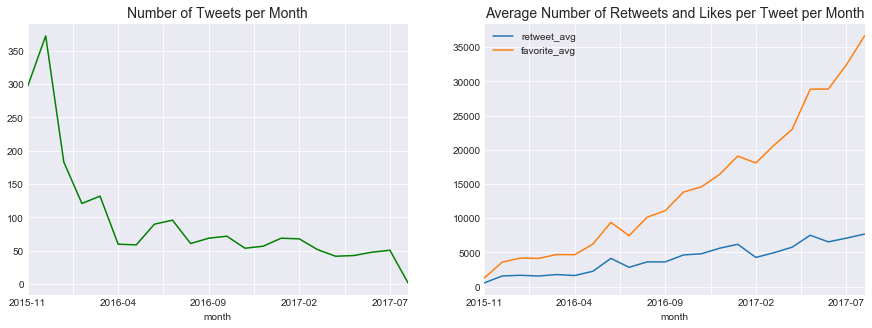

In [100]:
# creating a line plot of tweets, retweets and likes evolution
sns.set_style("darkgrid")

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.set_title('Number of Tweets per Month', fontsize=14)

tweets_per_month['tweets'].plot(kind='line', ax=ax1, color='green')

ax2 = fig.add_subplot(122)
ax2.set_title('Average Number of Retweets and Likes per Tweet per Month', fontsize=14)

tweets_per_month[['retweet_avg', 'favorite_avg']].plot(kind='line', ax=ax2)

plt.show()

From the above graph we can clearly see that while the amount of tweets published per month is decreasing over time, the amount of retweets and likes per tweet are both increasing. 

## Ratings Distribution

Let's look at the distribution of ratings, as well as the best and worst rated dogs.

In [101]:
master.groupby('rating')['tweet_id'].count()

rating
0.100      4
0.200      9
0.300     19
0.400     15
0.500     33
0.600     32
0.700     54
0.800     98
0.900    155
0.975      1
1.000    430
1.100    411
1.126      1
1.127      1
1.200    465
1.300    257
1.400     34
Name: tweet_id, dtype: int64

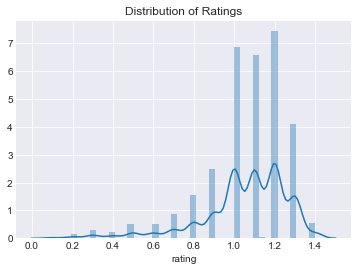

In [102]:
# building histogram of ratings
plt.title('Distribution of Ratings')
sns.distplot(master['rating'])
plt.show()

The distribution of ratings is left skewed, with most of the ratings falling between 1 and 1.3. Let's look at the long tail of the lowest rankings.

In [103]:
# getting a sample of 5 lowest rated dogs
sample_ids = master[(master.rating < 0.5)].sample(5, random_state=1)['tweet_id'].values

for tweetid in sample_ids:
    show_image(master, tweetid)

This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl


This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ


These are strange dogs. All have toupees. Long neck for dogs. In a shed of sorts? Work in groups? 4/10 still petable https://t.co/PZxSarAfSN


This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2


This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M


Looking at our sample, it actually seems that the ratings in the long tail are not given to dogs, but rather to other kinds of animals. Let's look at how the distribution of ratings looks like for dogs and non-dogs predictions in our dataset.

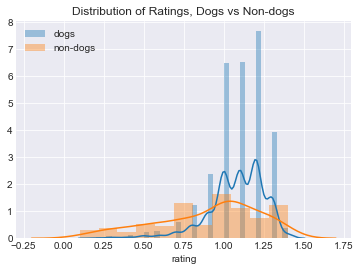

In [104]:
# distribution of ratings for dogs and non-dogs
sns.distplot(master[master.is_dog == True]['rating'], label='dogs')
sns.distplot(master[master.is_dog == False]['rating'], label='non-dogs')
plt.title('Distribution of Ratings, Dogs vs Non-dogs')
plt.legend(loc='upper left')
plt.show()

In [105]:
# calculating mean and median ratings for dogs
master[master.is_dog == True]['rating'].mean(), master[master.is_dog == True]['rating'].median()

(1.0822320699708454, 1.1)

In [106]:
# calculating mean and median ratings for non-dogs
master[master.is_dog == False]['rating'].mean(), master[master.is_dog == False]['rating'].median()

(0.90230263157894741, 1.0)

We can confirm that on average the images that were classified as non-dogs receive lower ranking. 

## Ratings evolution over time

Let's see whether the average rating has changed over time.

In [107]:
# calculating average rating evolution
master.groupby([master.timestamp.dt.year, master.timestamp.dt.month])['rating'].mean()

timestamp  timestamp
2015       11           0.892434
           12           0.958541
2016       1            1.009942
           2            1.010909
           3            1.037398
           4            1.058929
           5            1.089474
           6            1.029762
           7            1.082222
           8            1.095082
           9            1.119476
           10           1.167308
           11           1.203774
           12           1.194643
2017       1            1.226471
           2            1.235937
           3            1.232653
           4            1.224390
           5            1.276190
           6            1.251111
           7            1.263265
           8            1.300000
Name: rating, dtype: float64

In [108]:
# building table for dog predictions share by month
predictions_by_type = master.groupby([master.timestamp.dt.year, master.timestamp.dt.month])\
.agg({'tweet_id':'count', 'is_dog': 'sum', 'rating': 'mean'})\
.rename(columns={'tweet_id':'predictions'})\
.reset_index(drop=True)

# adding average rating for dog predictions
predictions_by_type['dog_rating'] = master[master.is_dog == True]\
.groupby([master.timestamp.dt.year, master.timestamp.dt.month])['rating'].mean().reset_index(drop=True)

# adding average rating for non-dog predictions
predictions_by_type['non_dog_rating'] = master[master.is_dog == False]\
.groupby([master.timestamp.dt.year, master.timestamp.dt.month])['rating'].mean().reset_index(drop=True)

# adding month as index
predictions_by_type['month'] = pd.date_range('2015-11-01','2017-08-01', freq='MS').strftime("%Y-%m").tolist()
predictions_by_type.set_index('month', inplace=True)

# adding dog ratio per month
predictions_by_type['dog_ratio'] = predictions_by_type.is_dog / predictions_by_type.predictions

predictions_by_type

,predictions,is_dog,rating,dog_rating,non_dog_rating,dog_ratio
month,,,,,,
2015-11,304,235.0,0.892434,0.944255,0.715942,0.773026
2015-12,366,289.0,0.958541,1.004242,0.787013,0.789617
2016-01,171,143.0,1.009942,1.037063,0.871429,0.836257
2016-02,110,95.0,1.010909,1.042105,0.813333,0.863636
2016-03,123,110.0,1.037398,1.059091,0.853846,0.894309
2016-04,56,52.0,1.058929,1.053846,1.125000,0.928571
2016-05,57,49.0,1.089474,1.104082,1.000000,0.859649
2016-06,84,73.0,1.029762,1.030137,1.027273,0.869048
2016-07,90,81.0,1.082222,1.085185,1.055556,0.900000


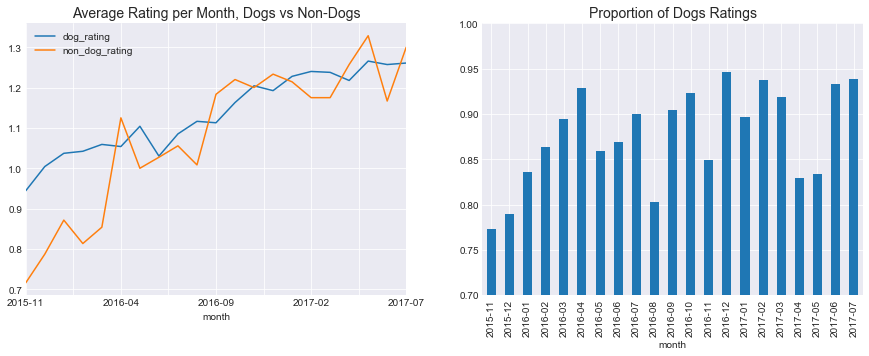

In [109]:
# showing evolution of dog predictions share by month
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.set_title('Average Rating per Month, Dogs vs Non-Dogs', fontsize=14)
predictions_by_type[['dog_rating', 'non_dog_rating']][:-1].plot(kind='line', ax=ax1)

ax2 = fig.add_subplot(122)
ax2.set_ylim((0.7,1))
ax2.set_title('Proportion of Dogs Ratings', fontsize=14)
predictions_by_type['dog_ratio'][:-1].plot(kind='bar', ax=ax2)

plt.show()

It looks like the average rating per dog is continuously increasing over time (both for dog predictions and for non-dog predictions). 

There is a positive trend in the share of dog ratings vs non-dog ratings in the first 6 months. This can probably explain the growing average rating over this period, since dogs tend to get higher ratings than non-dogs. 
As for the rest of the upward trend, another possible explanation is that there are more and more good doggos in the world, that is why the average ranking is increasing.

It is also interesting to see that the average ranking during the first two months was less than 1 (meaning that some of the rankings at that time actually respected the logic of a X out of 10 ranking). Probably it was after the third month that the author of the tweets decided to stick to the unique rating system that resulted into rankings of more than 1.

## Non-dog predictions

Let's see what other predictions, rather than dogs, are the most common ones.

In [110]:
# getting summary of non-dog predictions
master[master.is_dog == False].groupby('best_prediction')['tweet_id'].count().sort_values(ascending=False)

best_prediction
web_site              10
teddy                  6
home_theater           5
minivan                5
porcupine              5
patio                  4
jigsaw_puzzle          4
doormat                4
tub                    4
llama                  3
sea_lion               3
guinea_pig             3
balloon                3
bow_tie                3
hamster                3
triceratops            3
motor_scooter          3
hippopotamus           3
common_iguana          3
Christmas_stocking     3
washbasin              3
ox                     3
refrigerator           2
comic_book             2
snail                  2
meerkat                2
ski_mask               2
paddle                 2
shield                 2
box_turtle             2
                      ..
lion                   1
limousine              1
leopard                1
leaf_beetle            1
lawn_mower             1
lacewing               1
killer_whale           1
ibex                   1
mud_turtl

The most common non-dog prediction is a website (looking at the images, this mostly happens when the image is a screenshot of some social media message).

The most common non-dog animal prediction is porcupine, though looking at the images of these predictions (see below) they look more like hedgehogs.

In [111]:
# showing tweets with porcupines
sample_ids = master[(master.best_prediction == 'porcupine')]['tweet_id'].values

for tweetid in sample_ids:
    show_image(master, tweetid)

This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd


This is Dwight. He's a pointy pupper. Very docile. Attracts marshmallows. Hurts to pet but definitely worth it 8/10 https://t.co/jjW7zTxY9Z


This is Lennon. He's in quite the predicament. 8/10 hang in there pupper https://t.co/7mf8XXPAZv


This is Pickles. She's a tiny pointy pupper. Average walker. Very skeptical of wet leaf. 8/10 https://t.co/lepRCaGcgw


Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx


## Ratings, retweets and likes by dog breed

Let's analyze the data by dog's breed to see whether any of the breeds tend to get higher ratings or are more popular with Twitter users.

In [112]:
# creating a summary table with info by dog breed
dogs_by_breed = master[master.is_dog == True].groupby('best_prediction')\
.agg({'tweet_id':'count', 'rating': 'mean', 'retweet_count': 'mean', 'favorite_count': 'mean'})\
.rename(columns={'tweet_id':'total'})

In [113]:
# top 5 most common breeds
dogs_by_breed.sort_values(by='total', ascending=False).head(5)

,total,rating,retweet_count,favorite_count
best_prediction,,,,
golden_retriever,162,1.156790,3815.851852,12569.148148
Labrador_retriever,112,1.116071,3758.276786,11782.017857
Pembroke,95,1.144211,3078.294737,10949.284211
Chihuahua,94,1.046809,2688.042553,7971.361702
pug,63,1.026984,1939.476190,6300.349206


In [114]:
# top 5 most highly rated breeds (with at least 10 ratings)
dogs_by_breed[dogs_by_breed.total > 10].sort_values(by='rating', ascending=False).head(5)

,total,rating,retweet_count,favorite_count
best_prediction,,,,
Samoyed,43,1.172093,4846.046512,14068.534884
golden_retriever,162,1.156790,3815.851852,12569.148148
Great_Pyrenees,16,1.150000,4342.562500,12027.437500
Pembroke,95,1.144211,3078.294737,10949.284211
Eskimo_dog,22,1.140909,4235.590909,10686.545455


In [115]:
# top 5 most highly liked breeds (with at least 10 ratings)
dogs_by_breed[dogs_by_breed.total > 10].sort_values(by='favorite_count', ascending=False).head(5)

,total,rating,retweet_count,favorite_count
best_prediction,,,,
French_bulldog,31,1.119355,5039.677419,18416.806452
Samoyed,43,1.172093,4846.046512,14068.534884
cocker_spaniel,32,1.137500,4673.593750,13142.500000
whippet,11,1.018182,4840.272727,12911.454545
Cardigan,21,1.114286,3798.333333,12840.190476


In [116]:
# top 5 worst rated breeds (with at least 10 ratings)
dogs_by_breed[dogs_by_breed.total > 10].sort_values(by='rating').head(5)

,total,rating,retweet_count,favorite_count
best_prediction,,,,
soft-coated_wheaten_terrier,15,0.866667,1046.133333,3404.200000
dalmatian,12,0.933333,1741.083333,5186.333333
Boston_bull,12,0.941667,1446.916667,5289.583333
Maltese_dog,19,0.973684,1238.263158,2959.684211
Airedale,13,0.984615,1292.923077,4891.692308


In [117]:
# top 5 less liked breeds (with at least 10 ratings)
dogs_by_breed[dogs_by_breed.total > 10].sort_values(by='favorite_count').head(5)

,total,rating,retweet_count,favorite_count
best_prediction,,,,
Maltese_dog,19,0.973684,1238.263158,2959.684211
soft-coated_wheaten_terrier,15,0.866667,1046.133333,3404.200000
Shih-Tzu,21,1.038095,1383.904762,3590.380952
beagle,21,1.019048,1345.571429,4356.428571
Airedale,13,0.984615,1292.923077,4891.692308


## Ratings, retweets and likes by dog stage

In [118]:
# creating a summary table with info by dog stage
master.groupby('dog_stage')\
.agg({'tweet_id':'count', 'rating': 'median', 'retweet_count': 'mean', 'favorite_count': 'mean'})\
.rename(columns={'tweet_id':'total'})

,total,rating,retweet_count,favorite_count
dog_stage,,,,
doggo,75,1.2,6627.053333,18157.933333
floofer,7,1.2,4968.714286,13206.000000
pupper,228,1.1,2353.385965,7107.666667
puppo,23,1.2,7027.086957,22723.913043


Looks like the most liked dog stage is puppo, whereas the least liked one is pupper.

## Most liked and retweeted dogs

And finally let's look at some of the top liked and retweeted dogs.

In [119]:
most_rt = master.sort_values(by='retweet_count', ascending=False)['tweet_id'].head(1).values[0]

show_image(master, most_rt)
print('Retweets:', master[master.tweet_id == most_rt]['retweet_count'].values[0])

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


Retweets: 79515


In [120]:
most_liked = master.sort_values(by='favorite_count', ascending=False)['tweet_id'].head(1).values[0]

show_image(master, most_liked)
print('Likes:', master[master.tweet_id == most_liked]['favorite_count'].values[0])

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


Likes: 132810


And remember: regardless of the rating, the amount of likes or retweets, they are all good doggos!